In [1]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

In [5]:
folder_selected = r'D:\DataSet\MySpaces\data'
df_events = loading_from_listfolder(folder_selected,'df_probs')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')
    
print('Number of subjects found: ' + str(len(df_agency)))

D:\DataSet\MySpaces\data\s01
D:\DataSet\MySpaces\data\s02
D:\DataSet\MySpaces\data\s03
D:\DataSet\MySpaces\data\s04
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MySpaces\data\s07
D:\DataSet\MySpaces\data\s08
D:\DataSet\MySpaces\data\s09
D:\DataSet\MySpaces\data\s10
D:\DataSet\MySpaces\data\s12
D:\DataSet\MySpaces\data\s13
D:\DataSet\MySpaces\data\s14
D:\DataSet\MySpaces\data\s15
**** Grand Average folder exists already ****
Number of subjects found: 14


# Phase coupling analysis

In [7]:
GA_df_events = dict()
nbins = 7
bins = np.linspace(-np.pi, np.pi, nbins)
bins = np.rad2deg(bins);
diff_bins = np.round(bins[1] - bins[0])
print(int(diff_bins))
print(bins)
list_subjects_events = []
nSubjects = len(df_events)
for iEvent,event_type in enumerate(df_events[0].keys()):
    print(event_type)
    list_subjects_events = []
    list_subjects_events_conca = []
    for iSubject in range(nSubjects):
        df_events[iSubject][event_type]['subjectID'] = iSubject
        df_events[iSubject][event_type]['group'] = df_events[iSubject][event_type]['group']*int(diff_bins)
        df_events[iSubject][event_type] = df_events[iSubject][event_type]
        list_subjects_events.append(df_events[iSubject][event_type])
    list_subjects_events_conca = pd.concat(list_subjects_events)
    GA_df_events.update({event_type:list_subjects_events_conca})

60
[-180. -120.  -60.    0.   60.  120.  180.]
cue
self


cue
self


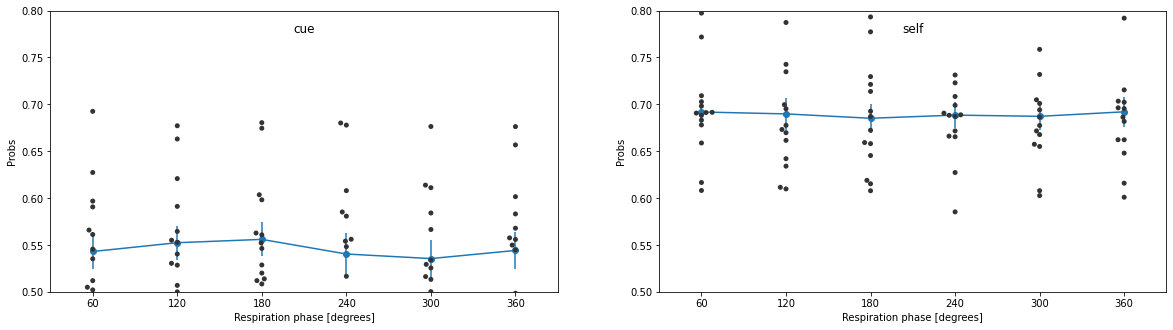

In [13]:

import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck

fig = plt.figure(figsize=(20,30))    
df_new = pd.DataFrame()

for iEvent,event_type in enumerate(df_events[0].keys()):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.groupby(['group','subjectID']).mean().reset_index()
    
    mean = df_new.groupby(['group']).mean().reset_index()
    dev = df_new.groupby(['group']).sem().reset_index()
    x = mean['Probs'].to_numpy()
    yerr = dev['Probs'].to_numpy()

    
    axs=fig.add_subplot(521+iEvent)
    axs.errorbar(np.arange(nbins),x, yerr=yerr, fmt='-o') #fmt=None to plot bars only
#     ax = sns.boxplot(x='group', y='Probs', data=df_new,width=0.8,linewidth=2,showfliers = True)
    ax = sns.swarmplot(x="group", y='Probs', data=df_new, color="0.2")
    ax.set_title(event_type,y=0.9)
    ax.set_xlabel("Respiration phase [degrees]")
    ax.set_ylabel("Probs")
    axs.set_xlim([0.5,(nbins)-0.5])
    axs.set_ylim([0.5,0.8])

# path = os.path.join(folderGA,'Agency_BreathingCoupling')
# saving_figure(event_type,path,fig)